# Climate Analysis

Analysis of global temperature data from the Berkeley Earth Surface Temperature Study (BEST). Our investigation will help us understand climate patterns and their changes over time, demonstrating key data analysis techniques using Python's scientific computing libraries.

The analysis is structured around three main categories of questions:
1. Understanding data quality and characteristics
2. Analyzing long-term temperature trends
3. Investigating seasonal patterns

Each section will build upon our findings to better understand global temperature patterns.

In [ ]:
# Import the core libraries we'll use throughout our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

project_folder = '/content/drive/My Drive/Colab Notebooks'

Mounted at /content/drive


In [ ]:
file_path = os.path.join(project_folder, "GlobalTemperatures.csv")

df = pd.read_csv(file_path)

## 1. Data Quality Assessment

In [ ]:
# dimensions of the dataframe
print(df.shape)

df.head(5)

(2098, 13)


,Date,Year,Month,Monthly_Anomaly,Monthly_Uncertainty,Annual_Anomaly,Annual_Uncertainty,Five_Year_Anomaly,Five_Year_Uncertainty,Ten_Year_Anomaly,Ten_Year_Uncertainty,Twenty_Year_Anomaly,Twenty_Year_Uncertainty
0,1850-01-01,1850,1,-0.692,0.356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-02-01,1850,2,-0.187,0.409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-03-01,1850,3,-0.370,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-04-01,1850,4,-0.521,0.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-05-01,1850,5,-0.564,0.198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# display the last 5 rows
df.tail(5)

,Date,Year,Month,Monthly_Anomaly,Monthly_Uncertainty,Annual_Anomaly,Annual_Uncertainty,Five_Year_Anomaly,Five_Year_Uncertainty,Ten_Year_Anomaly,Ten_Year_Uncertainty,Twenty_Year_Anomaly,Twenty_Year_Uncertainty
2093,2024-06-01,2024,6,1.128,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2094,2024-07-01,2024,7,1.148,0.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2095,2024-08-01,2024,8,1.256,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,2024-09-01,2024,9,1.137,0.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,2024-10-01,2024,10,1.193,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# look at the data structure & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2098 non-null   object 
 1   Year                     2098 non-null   int64  
 2   Month                    2098 non-null   int64  
 3   Monthly_Anomaly          2098 non-null   float64
 4   Monthly_Uncertainty      2098 non-null   float64
 5   Annual_Anomaly           2087 non-null   float64
 6   Annual_Uncertainty       2087 non-null   float64
 7   Five_Year_Anomaly        2039 non-null   float64
 8   Five_Year_Uncertainty    2039 non-null   float64
 9   Ten_Year_Anomaly         1979 non-null   float64
 10  Ten_Year_Uncertainty     1979 non-null   float64
 11  Twenty_Year_Anomaly      1859 non-null   float64
 12  Twenty_Year_Uncertainty  1859 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 213.2+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Date                         0
Year                         0
Month                        0
Monthly_Anomaly              0
Monthly_Uncertainty          0
Annual_Anomaly              11
Annual_Uncertainty          11
Five_Year_Anomaly           59
Five_Year_Uncertainty       59
Ten_Year_Anomaly           119
Ten_Year_Uncertainty       119
Twenty_Year_Anomaly        239
Twenty_Year_Uncertainty    239
dtype: int64


In [ ]:
# Summary statistics
df.describe()

,Year,Month,Monthly_Anomaly,Monthly_Uncertainty,Annual_Anomaly,Annual_Uncertainty,Five_Year_Anomaly,Five_Year_Uncertainty,Ten_Year_Anomaly,Ten_Year_Uncertainty,Twenty_Year_Anomaly,Twenty_Year_Uncertainty
count,2098.000000,2098.000000,2098.000000,2098.000000,2087.000000,2087.000000,2039.000000,2039.000000,1979.000000,1979.000000,1859.000000,1859.000000
mean,1936.917064,6.495234,-0.010745,0.107279,-0.012836,0.075880,-0.020941,0.062932,-0.029949,0.058727,-0.044392,0.054320
std,50.481929,3.451030,0.387973,0.070178,0.367406,0.043654,0.342828,0.035782,0.324447,0.031032,0.293663,0.027111
min,1850.000000,1.000000,-0.938000,0.026000,-0.570000,0.024000,-0.454000,0.019000,-0.423000,0.017000,-0.361000,0.014000
25%,1893.000000,3.250000,-0.291000,0.040250,-0.288000,0.030000,-0.288000,0.022000,-0.293000,0.020000,-0.292500,0.019000
50%,1937.000000,6.000000,-0.098500,0.104000,-0.112000,0.079000,-0.104000,0.071000,-0.083000,0.069000,-0.074000,0.068000
75%,1981.000000,9.000000,0.196750,0.137000,0.173000,0.094000,0.187500,0.080000,0.120500,0.078000,0.078000,0.074000
max,2024.000000,12.000000,1.323000,0.444000,1.214000,0.207000,0.949000,0.198000,0.894000,0.122000,0.744000,0.096000


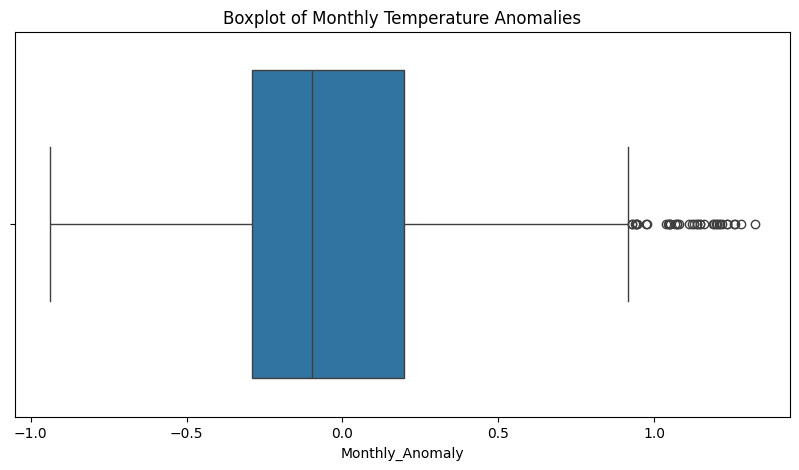

In [ ]:
# Boxplot for Monthly Anomalies
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Monthly_Anomaly"])
plt.title("Boxplot of Monthly Temperature Anomalies")
plt.show()


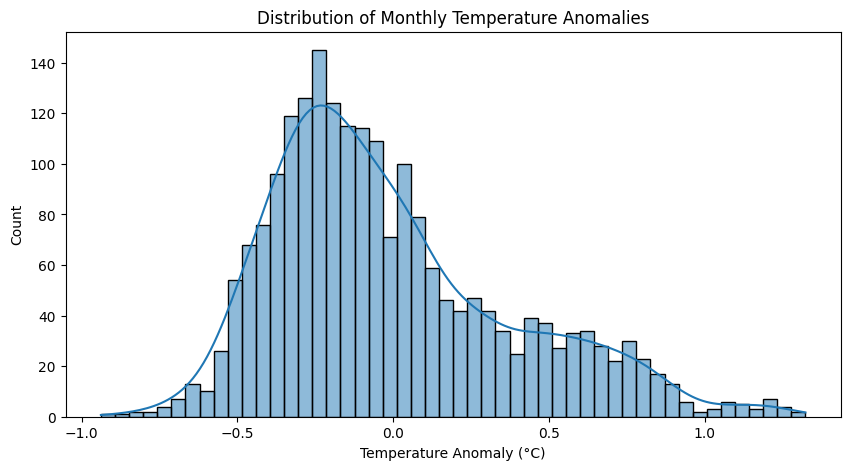

In [ ]:
# Histogram of Monthly Anomalies
plt.figure(figsize=(10, 5))
sns.histplot(df["Monthly_Anomaly"], bins=50, kde=True)
plt.title("Distribution of Monthly Temperature Anomalies")
plt.xlabel("Temperature Anomaly (°C)")
plt.show()

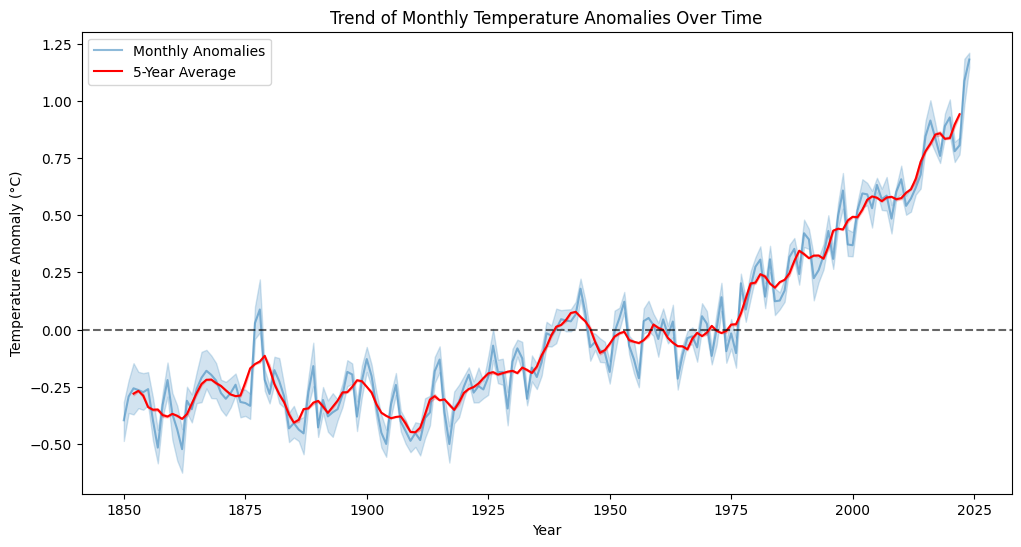

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Year"], y=df["Monthly_Anomaly"], label="Monthly Anomalies", alpha=0.5)
sns.lineplot(x=df["Year"], y=df["Five_Year_Anomaly"], label="5-Year Average", color="red")
plt.axhline(y=0, color="black", linestyle="--", alpha=0.6)
plt.title("Trend of Monthly Temperature Anomalies Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.show()

## 2. Temperature Trend Analysis

In [17]:
# Years with max temperature anomalies

max_anomaly = df.loc[df["Monthly_Anomaly"].idxmax()]

print(f"Highest temperature anomaly: {max_anomaly['Year']} ({max_anomaly['Monthly_Anomaly']}°C)")


Highest temperature anomaly: 2023 (1.323°C)


In [18]:
# Years with min temperature anomalies

min_anomaly = df.loc[df["Monthly_Anomaly"].idxmin()]

print(f"Lowest temperature anomaly: {min_anomaly['Year']} ({min_anomaly['Monthly_Anomaly']}°C)")

Lowest temperature anomaly: 1861 (-0.938°C)


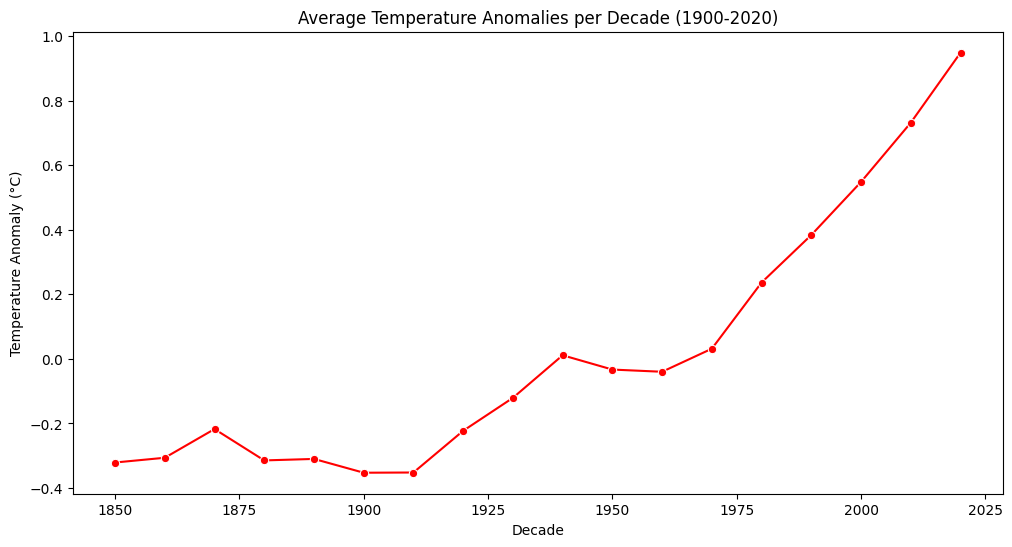

In [19]:
# Group by decade and compute mean anomalies
df["Decade"] = (df["Year"] // 10) * 10
decade_trend = df.groupby("Decade")["Monthly_Anomaly"].mean()

# Plot trend over decades
plt.figure(figsize=(12, 6))
sns.lineplot(x=decade_trend.index, y=decade_trend.values, marker="o", color="red")
plt.title("Average Temperature Anomalies per Decade (1900-2020)")
plt.xlabel("Decade")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

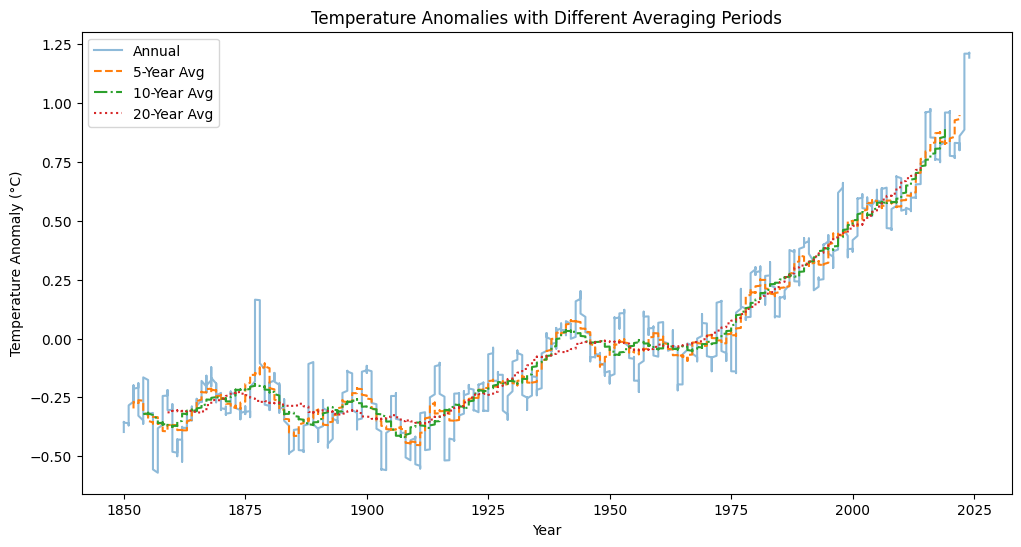

In [20]:
# Averaging different periods
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Annual_Anomaly"], label="Annual", alpha=0.5)
plt.plot(df["Year"], df["Five_Year_Anomaly"], label="5-Year Avg", linestyle="--")
plt.plot(df["Year"], df["Ten_Year_Anomaly"], label="10-Year Avg", linestyle="-.")
plt.plot(df["Year"], df["Twenty_Year_Anomaly"], label="20-Year Avg", linestyle=":")
plt.title("Temperature Anomalies with Different Averaging Periods")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.show()

## 3. Monthly Pattern Analysis


<ipython-input-21-72157340be7e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")


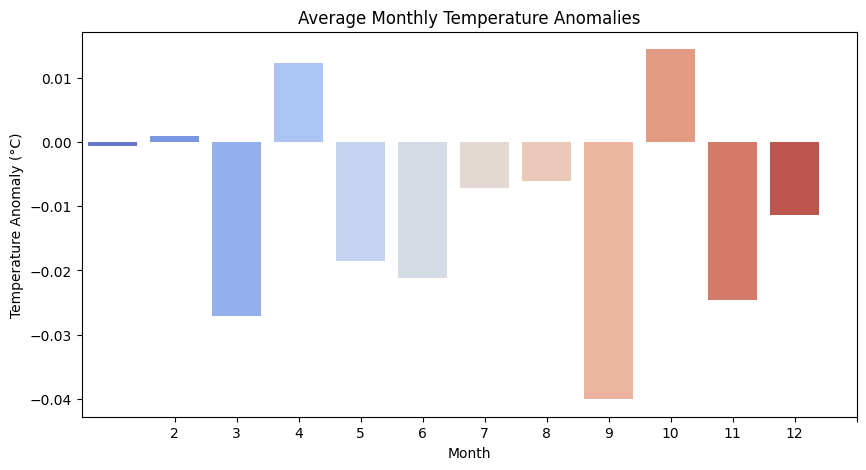

In [21]:
# Group by month and compute mean anomalies
monthly_avg = df.groupby("Month")["Monthly_Anomaly"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
plt.title("Average Monthly Temperature Anomalies")
plt.xlabel("Month")
plt.ylabel("Temperature Anomaly (°C)")
plt.xticks(range(1, 13))
plt.show()

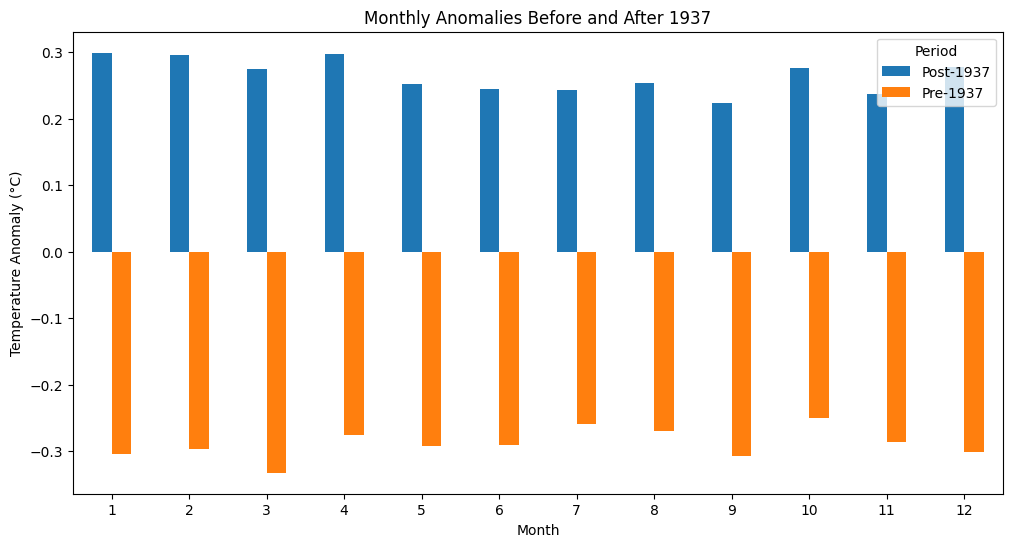

In [22]:
# Comparing Pre-1937 and Post-1937

df["Period"] = np.where(df["Year"] < 1937, "Pre-1937", "Post-1937")
monthly_comparison = df.groupby(["Month", "Period"])["Monthly_Anomaly"].mean().unstack()

# Plot
monthly_comparison.plot(kind="bar", figsize=(12, 6))
plt.title("Monthly Anomalies Before and After 1937")
plt.xlabel("Month")
plt.ylabel("Temperature Anomaly (°C)")
plt.xticks(range(12), labels=range(1, 13), rotation=0)
plt.legend(title="Period")
plt.show()


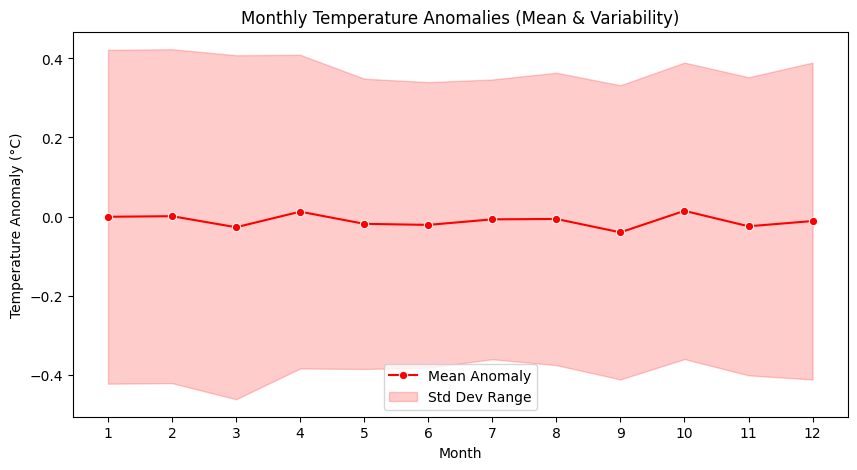

In [23]:
# Group by month and compute mean and standard deviation of anomalies
monthly_trends = df.groupby("Month")["Monthly_Anomaly"].agg(["mean", "std"])

# Plot mean anomalies for each month
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trends.index, y=monthly_trends["mean"], marker="o", color="red", label="Mean Anomaly")
plt.fill_between(monthly_trends.index,
                 monthly_trends["mean"] - monthly_trends["std"],
                 monthly_trends["mean"] + monthly_trends["std"],
                 color="red", alpha=0.2, label="Std Dev Range")
plt.title("Monthly Temperature Anomalies (Mean & Variability)")
plt.xlabel("Month")
plt.ylabel("Temperature Anomaly (°C)")
plt.xticks(range(1, 13))
plt.legend()
plt.show()


<ipython-input-24-917662815ec4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_deviation.index, y=monthly_deviation["mean"], palette="coolwarm")


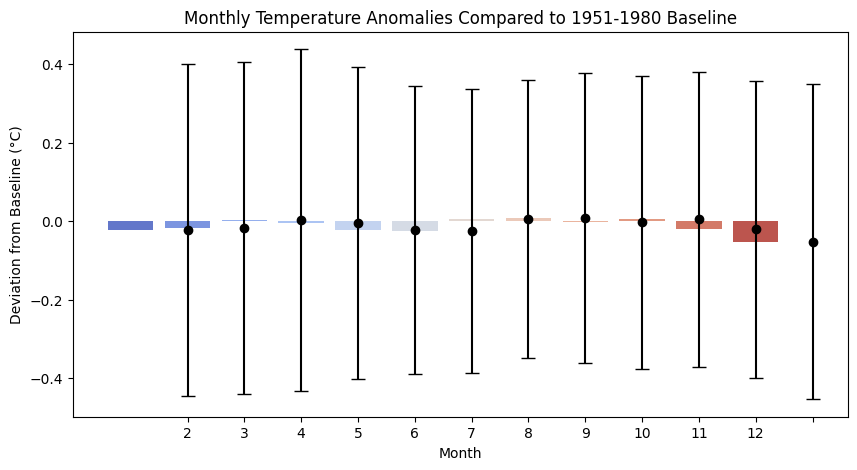

In [24]:
# Define the baseline period (1951-1980)
baseline_period = df[(df["Year"] >= 1951) & (df["Year"] <= 1980)]

# Compute mean and standard deviation for baseline period
baseline_monthly = baseline_period.groupby("Month")["Monthly_Anomaly"].agg(["mean", "std"])

# Compute the deviation from the baseline for all years
df["Deviation_from_Baseline"] = df.apply(lambda row: row["Monthly_Anomaly"] - baseline_monthly.loc[row["Month"], "mean"], axis=1)

# Group by month to analyze deviation statistics
monthly_deviation = df.groupby("Month")["Deviation_from_Baseline"].agg(["mean", "std"])

# Plot deviation from baseline
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_deviation.index, y=monthly_deviation["mean"], palette="coolwarm")
plt.errorbar(monthly_deviation.index, monthly_deviation["mean"], yerr=monthly_deviation["std"], fmt="o", color="black", capsize=5)
plt.title("Monthly Temperature Anomalies Compared to 1951-1980 Baseline")
plt.xlabel("Month")
plt.ylabel("Deviation from Baseline (°C)")
plt.xticks(range(1, 13))
plt.show()


## 4. Feature Engineering

In [25]:
# Compute the mean and standard deviation
mean_anomaly = df["Monthly_Anomaly"].mean()
std_anomaly = df["Monthly_Anomaly"].std()

# Binning
def categorize_anomaly(anomaly):
    if anomaly <= mean_anomaly - 2 * std_anomaly:
        return "Extreme Cold"
    elif anomaly <= mean_anomaly - std_anomaly:
        return "Cold"
    elif anomaly < mean_anomaly + std_anomaly:
        return "Neutral"
    elif anomaly < mean_anomaly + 2 * std_anomaly:
        return "Warm"
    else:
        return "Extreme Warm"

df["Anomaly_Category"] = df["Monthly_Anomaly"].apply(categorize_anomaly)

# Display category counts
print(df["Anomaly_Category"].value_counts())


Anomaly_Category
Neutral         1479
Warm             262
Cold             252
Extreme Warm     100
Extreme Cold       5
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

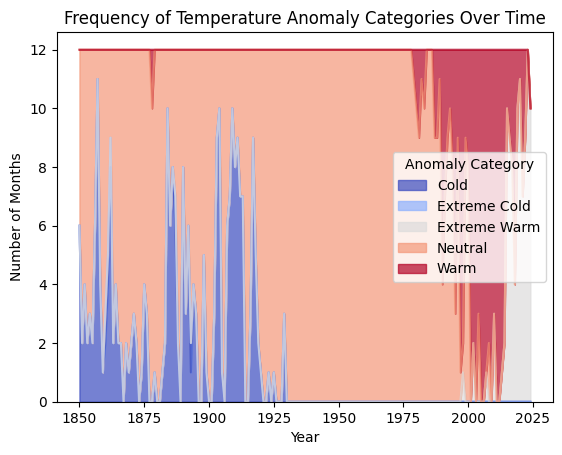

In [26]:
# Group by Year and count occurrences of each category
category_trend = df.groupby(["Year", "Anomaly_Category"])["Monthly_Anomaly"].count().unstack()

# Plot category frequencies over time
plt.figure(figsize=(12, 6))
category_trend.plot(kind="area", stacked=True, colormap="coolwarm", alpha=0.7)
plt.title("Frequency of Temperature Anomaly Categories Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Months")
plt.legend(title="Anomaly Category")
plt.show()
